In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
#loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
#loading the modeling data
data = pd.read_excel('/content/drive/My Drive/Gitlab/modelling_data.xlsx')

In [94]:
data.head()

Country Name_left                                           geometry  \
0           ALGERIA  POLYGON ((-3.553277999999864 31.06992500000007...   
1            ANGOLA  POLYGON ((11.759446987000103 -17.2542559149999...   
2             BENIN  POLYGON ((2.8408750000000396 12.40598900000003...   
3          BOTSWANA  POLYGON ((25.16312400000004 -17.77815799999996...   
4      BURKINA FASO  POLYGON ((-0.3957059999999615 15.0175320000000...   

   index_right Country Name_right       Year  \
0            0            Algeria 2007-01-01   
1            1             Angola 2007-01-01   
2            2              Benin 2007-01-01   
3            3           Botswana 2007-01-01   
4            4       Burkina Faso 2007-01-01   

   Incidence of malaria (per 1,000 population at risk)  \
0                                               0.01     
1                                             286.72     
2                                             480.24     
3                                               1.03     
4                                             503.80     

   Malaria cases reported  Malaria death  \
0                      26              0   
1                 1533485          18237   
2                       0          12034   
3                     390              3   
4                   44246          31272   

   Use of insecticide-treated bed net in total population  \
0                                             4.7625        
1                                            18.0000        
2                                             2.8125        
3                                            21.6500        
4                                            24.9200        

   Children with fever receiving antimalarial drugs (% of children under age 5 with fever)  \
0                                             4.9125                                         
1                                            29.8000                                         
2                                            18.6750                                         
3                                            73.8625                                         
4                                            67.0625                                         

   ...  Mortality Rate  Prevalence Rate  Incidence Rate Urban  \
0  ...        0.000000     7.650698e-07              0.000153   
1  ...        0.872180     7.333851e-02              4.984701   
2  ...        1.391574     0.000000e+00             11.555342   
3  ...        0.001525     1.982738e-04              0.017780   
4  ...        2.119119     2.998291e-03             21.904348   

   Incidence Rate Rural  Standardized Incidence Rate  Mortality Rate Urban  \
0              0.000289                     0.000765              0.000000   
1              6.749529                    73.338507              1.516201   
2              8.217659                     0.000000              3.348510   
3              0.024483                     0.198274              0.002633   
4              6.542857                     2.998291              9.215164   

   Mortality Rate Rural  Gi_Star_Incidence  Gi_Star_Mortality   Gi_Star  
0              0.000000           0.002217           0.001471  0.000625  
1              2.053347           0.001619           0.001651  0.000892  
2              2.381120           0.004725           0.005341  0.001474  
3              0.003625           0.000708           0.000669  0.000364  
4              2.751960           0.004645           0.004808  0.001674  

[5 rows x 37 columns]

In [95]:
data.columns

Index(['Country Name_left', 'geometry', 'index_right', 'Country Name_right',
       'Year', 'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported', 'Malaria death',
       'Use of insecticide-treated bed net in total population',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Total Population', 'Rural Population', 'Urban Population',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People usin

#Preparing the data for modeling

In [96]:
#dropping some columns
data = data.drop(columns = ['Prevalence Rate', 'Gi_Star_Incidence', 'Gi_Star_Mortality',
       'Gi_Star'], axis = 1)

In [97]:
data = data.rename(columns={"Incidence of malaria (per 1,000 population at risk)": "Incidence of malaria",
'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)' : 'Children under age 5 with fever receiving antimalarial drugs'})

#Feature selection
A way to select features is using feature importance. I will be using the permutation feature importance techniques over a variety of models such as RandomForest and Boosting methods.

Permutation feature importance is a technique used to evaluate the importance of each feature in a predictive model. It works by permuting the values of a single feature while keeping the other features unchanged, and then measuring the resulting decrease in model performance. The greater the decrease in performace, the more important the feature is considered.

Selected Features: ['Malaria cases reported', 'Children under age 5 with fever receiving antimalarial drugs', 'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)', 'Total Population', 'Rural Population', 'Rural population (% of total population)', 'Rural population growth (annual %)', 'Urban population (% of total population)', 'People using at least basic drinking water services (% of population)', 'People using at least basic drinking water services, rural (% of rural population)', 'People using at least basic drinking water services, urban (% of urban population)', 'Standardized Incidence Rate']


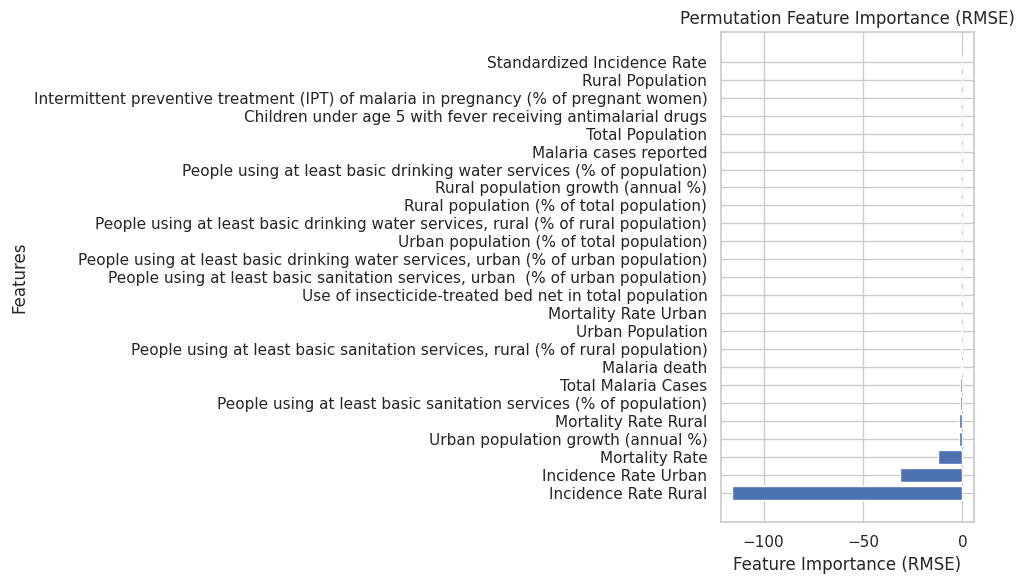

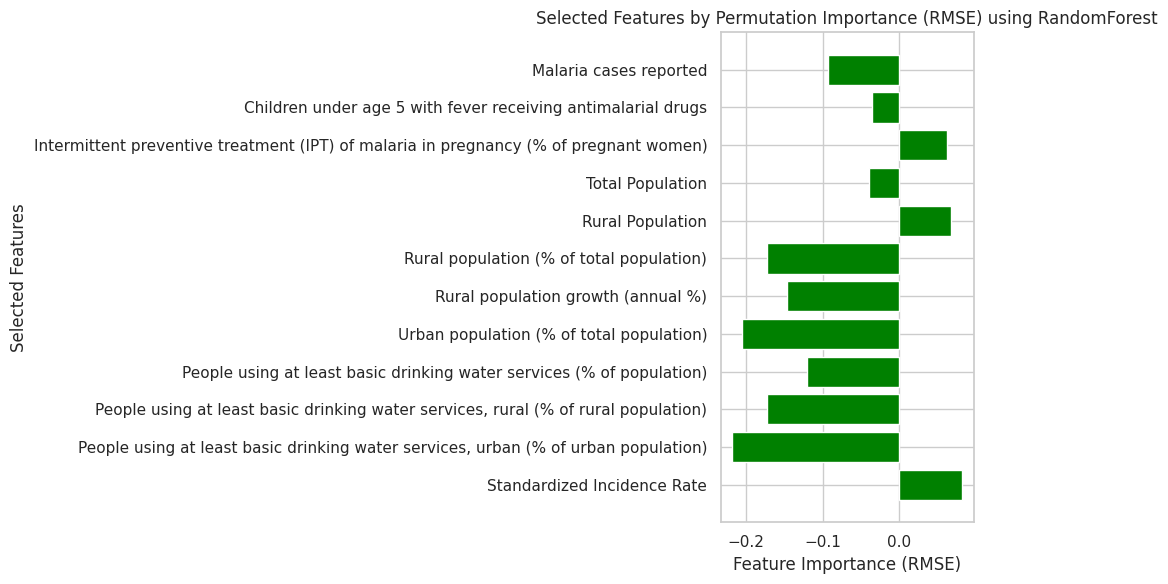

In [98]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

X = data.drop(columns=["Incidence of malaria", 'Country Name_left', 'Country Name_right', 'geometry', 'Year', 'index_right', 'latitude', 'longitude'], axis=1)
y = data['Incidence of malaria']

# Normalizing the data inputs
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Calculate permutation feature importances using RMSE
def calculate_rmse(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(mean_squared_error(y, y_pred))

result = permutation_importance(model, X_test, y_test, scoring=calculate_rmse, n_repeats=10, random_state=42)

# Get the feature importance scores
importance_scores = result.importances_mean

# Set a threshold (adjust as needed)
threshold = np.percentile(importance_scores, 50)

# Select features based on the threshold
selected_features = [feature for feature, importance in zip(X.columns, importance_scores) if importance > threshold]

print("Selected Features:", selected_features)

# Sort the list of feature importance tuples
feature_importance_list = list(zip(X.columns, importance_scores))
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Extract feature names and importance scores after sorting
sorted_feature_names, sorted_importance_scores = zip(*feature_importance_list)

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_importance_scores, align='center')
plt.xlabel("Feature Importance (RMSE)")
plt.ylabel("Features")
plt.title("Permutation Feature Importance (RMSE)")
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.gca().invert_yaxis()
plt.tight_layout()

# Create a horizontal bar chart of selected features in order of importance
selected_feature_indices = [sorted_feature_names.index(feature) for feature in selected_features]
selected_importance_scores = [sorted_importance_scores[i] for i in selected_feature_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_features)), selected_importance_scores, align='center', color='green')
plt.xlabel("Feature Importance (RMSE)")
plt.ylabel("Selected Features")
plt.title("Selected Features by Permutation Importance (RMSE) using RandomForest")
plt.yticks(range(len(selected_features)), selected_features)
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

Selected Features: ['Malaria cases reported', 'Use of insecticide-treated bed net in total population', 'Children under age 5 with fever receiving antimalarial drugs', 'Total Population', 'Rural Population', 'Urban population (% of total population)', 'People using at least basic drinking water services, rural (% of rural population)', 'People using at least basic drinking water services, urban (% of urban population)', 'People using at least basic sanitation services (% of population)', 'People using at least basic sanitation services, rural (% of rural population)', 'People using at least basic sanitation services, urban  (% of urban population)', 'Standardized Incidence Rate']


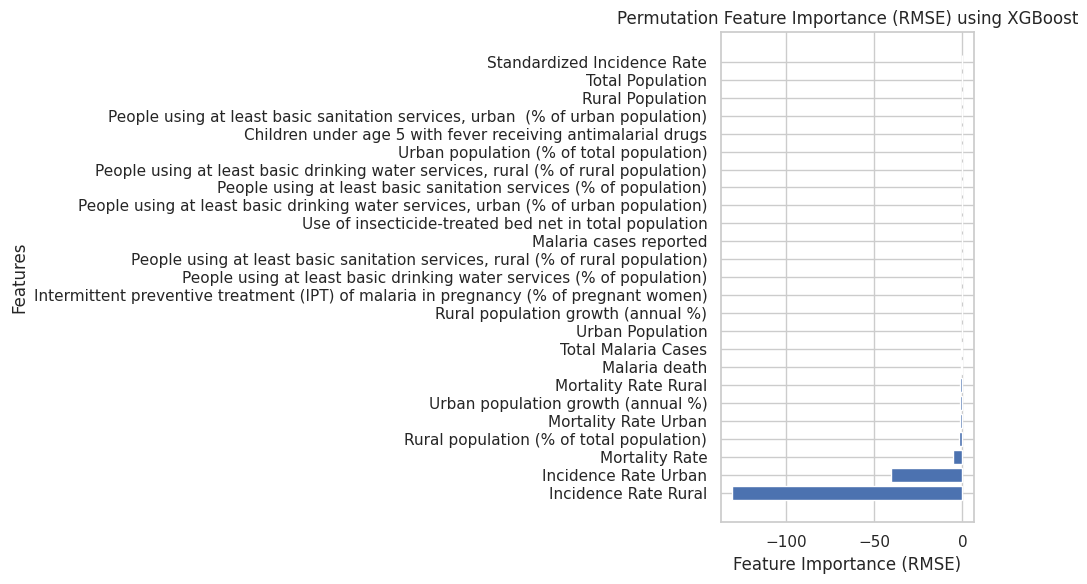

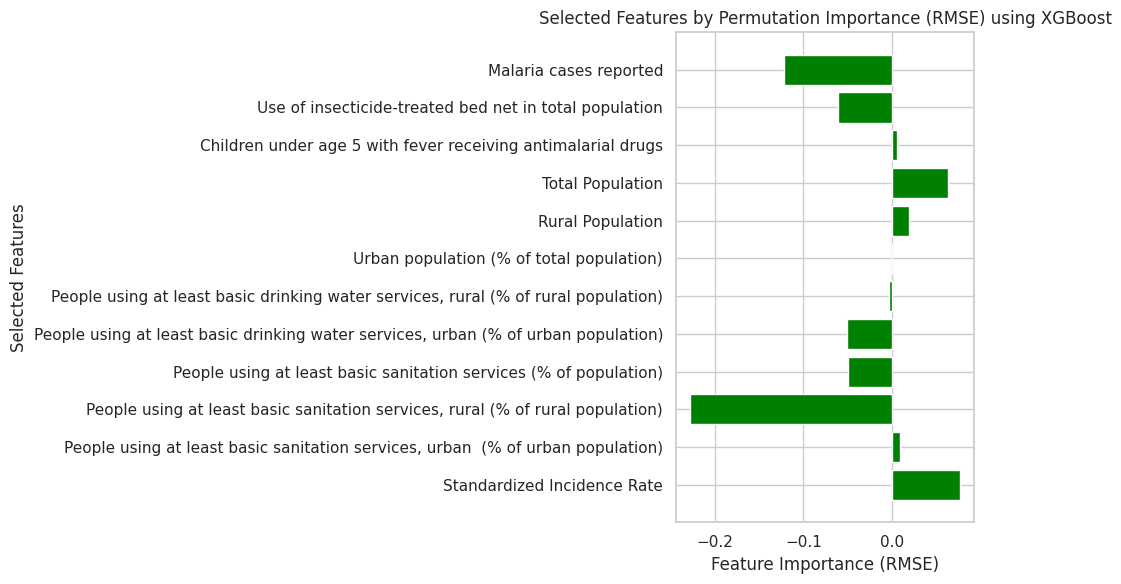

In [99]:
#let us also check using a boosting method
import xgboost as xgb

X = data.drop(columns=["Incidence of malaria", 'Country Name_left', 'Country Name_right', 'geometry', 'Year', 'index_right', 'latitude', 'longitude'], axis=1)
y = data['Incidence of malaria']

# Normalizing the data inputs
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Fit the XGBoost model
model.fit(X_train, y_train)

# Calculate permutation feature importances using RMSE
def calculate_rmse(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(mean_squared_error(y, y_pred))

result = permutation_importance(model, X_test, y_test, scoring=calculate_rmse, n_repeats=10, random_state=42)

# Get the feature importance scores
importance_scores = result.importances_mean

# Set a threshold (adjust as needed)
threshold = np.percentile(importance_scores, 50)

# Select features based on the threshold
selected_features = [feature for feature, importance in zip(X.columns, importance_scores) if importance > threshold]

print("Selected Features:", selected_features)

# Sort the list of feature importance tuples
feature_importance_list = list(zip(X.columns, importance_scores))
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Extract feature names and importance scores after sorting
sorted_feature_names, sorted_importance_scores = zip(*feature_importance_list)

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_importance_scores, align='center')
plt.xlabel("Feature Importance (RMSE)")
plt.ylabel("Features")
plt.title("Permutation Feature Importance (RMSE) using XGBoost")
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.gca().invert_yaxis()
plt.tight_layout()

# Create a horizontal bar chart of selected features in order of importance
selected_feature_indices = [sorted_feature_names.index(feature) for feature in selected_features]
selected_importance_scores = [sorted_importance_scores[i] for i in selected_feature_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_features)), selected_importance_scores, align='center', color='green')
plt.xlabel("Feature Importance (RMSE)")
plt.ylabel("Selected Features")
plt.title("Selected Features by Permutation Importance (RMSE) using XGBoost")
plt.yticks(range(len(selected_features)), selected_features)
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

In [100]:
data.columns

Index(['Country Name_left', 'geometry', 'index_right', 'Country Name_right',
       'Year', 'Incidence of malaria', 'Malaria cases reported',
       'Malaria death',
       'Use of insecticide-treated bed net in total population',
       'Children under age 5 with fever receiving antimalarial drugs',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Total Population', 'Rural Population', 'Urban Population',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
 

In [102]:
#Now let us select our features based on what we have above

selected_features2 = data[['Malaria cases reported', 'Malaria death', 'Total Malaria Cases', 'Mortality Rate',
'Total Population']]

len(selected_features2)

440

# Model Building

In [103]:
pip install lime

In [104]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import lime
import lime.lime_tabular
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = selected_features2
#y = data['Incidence of malaria']
y = data['Standardized Incidence Rate']
# Normalizing the data inputs
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)

In [105]:
#let us evaluate on the training set
y_train_pred = rf_model.predict(X_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 9.600518199860671
Mean Squared Error (MSE): 1892.0339665569568
Root Mean Squared Error (RMSE): 43.49751678609891
R-squared (R2) Score: 0.9939106491764921


In [106]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 18.65628508958724
Mean Squared Error (MSE): 1977.4318282701895
Root Mean Squared Error (RMSE): 44.468323875205705
R-squared (R2) Score: 0.9930851022754448


In [107]:
#Let us train another model - XGBOOST
from xgboost import XGBRegressor

# Create an XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [108]:
#let us evaluate on the training set
y_train_pred = xgb_model.predict(X_train)

# Calculate regression metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 0.06679029886310728
Mean Squared Error (MSE): 0.009978389355845135
Root Mean Squared Error (RMSE): 0.09989188833856899
R-squared (R2) Score: 0.9999999678854004


In [109]:
# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 19.612624381354525
Mean Squared Error (MSE): 3011.250523590985
Root Mean Squared Error (RMSE): 54.87486240156767
R-squared (R2) Score: 0.9894699331243899


# Stacking Regressor
As an improvement on the Team Flask Project, a RandomForest Regressor was used, in our project. We employed a stacking regressor to combine the randomforest and xgboost regressors used above

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define features (X) and target (y)
#X = selected_features1
#y = data['Incidence of malaria']

# Normalizing the data inputs
#scaler = MinMaxScaler()
#X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define the base regressors
base_regressors = [
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgboost', XGBRegressor(n_estimators=100, random_state=42))


]

# Define the final regressor as RandomForestRegressor
meta_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_regressors, final_estimator=meta_regressor)

# Train the stacking regressor
stacking_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('random_forest',
                               RandomForestRegressor(random_state=42)),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...))],
                  final_estimator=RandomForestRegressor(random_state=42))

In [111]:
#let us evaluate the stacking regressor on the training set
y_train_pred = stacking_regressor.predict(X_train)

# Calculate regression metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 17.970717481954992
Mean Squared Error (MSE): 5463.686609479457
Root Mean Squared Error (RMSE): 73.9167545924431
R-squared (R2) Score: 0.9824155881221485


In [112]:
# Make predictions
y_pred = stacking_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 23.395603972027246
Mean Squared Error (MSE): 5690.2118550232835
Root Mean Squared Error (RMSE): 75.43349292604236
R-squared (R2) Score: 0.9801018510747055


# Voting Regressor

In [113]:
#let us also use a voting regressor
from sklearn.ensemble import VotingRegressor


# Define the individual regressors
regressors = [
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    #('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgboost', XGBRegressor(n_estimators=100, random_state=42)),


]

# Create the voting regressor
voting_regressor = VotingRegressor(estimators=regressors)

# Train the voting regressor
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('random_forest',
                             RandomForestRegressor(random_state=42)),
                            ('xgboost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...))])

In [114]:
#let us evaluate the voting regressor on the training set
y_train_pred = voting_regressor.predict(X_train)

# Calculate regression metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 4.814238452457706
Mean Squared Error (MSE): 473.09735000567434
Root Mean Squared Error (RMSE): 21.750801134801318
R-squared (R2) Score: 0.9984773763110083


In [115]:
# Make predictions using the voting regressor
y_pred = voting_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 16.876754938317944
Mean Squared Error (MSE): 2082.0021213873265
Root Mean Squared Error (RMSE): 45.62896143226719
R-squared (R2) Score: 0.9927194295520699


The stacking regressor is slightly better than the voting regressor

# Validation and Optimization of the stacking regressor

 # RandomForestRegressor - Cross Validation and Hyperparameter Tuning

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 10 folds and scoring as negative mean squared error
neg_mse_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive mean squared error
mse_scores = -neg_mse_scores

# Calculate other evaluation metrics based on the mean squared error
mae_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='r2')

# Print the results
print(f"Mean Absolute Error (MAE) scores: {mae_scores}")
print(f"Mean Squared Error (MSE) scores: {mse_scores}")
print(f"Root Mean Squared Error (RMSE) scores: {rmse_scores}")
print(f"R-squared (R2) scores: {r2_scores}")

# Calculate the mean and standard deviation of the evaluation metrics
mean_mae = np.mean(-mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

std_mae = np.std(-mae_scores)
std_mse = np.std(mse_scores)
std_rmse = np.std(rmse_scores)
std_r2 = np.std(r2_scores)
print('---'*20)
print(f"Mean MAE: {mean_mae}, Std MAE: {std_mae}")
print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}")
print(f"Mean RMSE: {mean_rmse}, Std RMSE: {std_rmse}")
print(f"Mean R2: {mean_r2}, Std R2: {std_r2}")

Mean Absolute Error (MAE) scores: [-60.19957293 -43.5939086  -48.34529859  -8.98334817 -16.76144061
  -9.18327187 -16.99513382 -43.36550754 -25.38436534 -19.19601876]
Mean Squared Error (MSE) scores: [44227.21390434 19637.34387888 52114.93737436   348.68548299
  2856.8535024    550.98171567  1332.89134219 17425.08860227
  5345.9311359   2761.86603417]
Root Mean Squared Error (RMSE) scores: [210.30267213 140.13330753 228.28696278  18.67312194  53.44954165
  23.47299972  36.50878445 132.00412343  73.11587472  52.55345882]
R-squared (R2) scores: [0.60601783 0.82624641 0.93156953 0.99837175 0.94987707 0.95260214
 0.92235971 0.98390124 0.98015725 0.9930241 ]
------------------------------------------------------------
Mean MAE: 29.20078662330004, Std MAE: 17.21354067444092
Mean MSE: 14660.17929731813, Std MSE: 18051.68640813105
Mean RMSE: 96.85008471617166, Std RMSE: 72.66526259354258
Mean R2: 0.9144127035037333, Std R2: 0.11328470126998995


HyperParameter Tuning for the RandomForest Regressor

In [117]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    # Create a Random Forest Regressor model
    rf_model = RandomForestRegressor(random_state=42)

    # Define the hyperparameter grid for RandomizedSearchCV
    param_dist = {
      'n_estimators': randint(50,100, 200),                  # Number of trees in the forest
      'max_depth': [None, 10, 20, 30],                   # Maximum depth of the trees
      'min_samples_split': randint(2, 10),              # Minimum number of samples required to split an internal node
      'min_samples_leaf': randint(1, 4),               # Minimum number of samples required to be at a leaf node
      'max_features': ['auto', 'sqrt'],                 # Number of features to consider when looking for the best split
      'bootstrap': [True, False]                         # Whether to use bootstrapping when building trees
  }

    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(
      rf_model, param_distributions=param_dist, n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42
  )

    # Fit the randomized search to the data
    random_search.fit(X_train, y_train)

    # Get the best estimator from random search
    best_rf_regressor = random_search.best_estimator_
    best_rf_regressor

    # Evaluate the best Random Forest Regressor on the test set
    y_pred = best_rf_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 19.670210817267968
Mean Squared Error (MSE): 2339.9996625332305
Root Mean Squared Error (RMSE): 48.373543001657744
R-squared (R2) Score: 0.991817235815373


# XGBOOST - Cross Validation and Hyperparameter Tuning

In [118]:
# Perform cross-validation with 10 folds and scoring as negative mean squared error
neg_mse_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive mean squared error
mse_scores = -neg_mse_scores

# Calculate other evaluation metrics based on the mean squared error
mae_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='r2')

# Print the results
print(f"Mean Absolute Error (MAE) scores: {mae_scores}")
print(f"Mean Squared Error (MSE) scores: {mse_scores}")
print(f"Root Mean Squared Error (RMSE) scores: {rmse_scores}")
print(f"R-squared (R2) scores: {r2_scores}")

# Calculate the mean and standard deviation of the evaluation metrics
mean_mae = np.mean(-mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

std_mae = np.std(-mae_scores)
std_mse = np.std(mse_scores)
std_rmse = np.std(rmse_scores)
std_r2 = np.std(r2_scores)
print('---'*20)
print(f"Mean MAE: {mean_mae}, Std MAE: {std_mae}")
print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}")
print(f"Mean RMSE: {mean_rmse}, Std RMSE: {std_rmse}")
print(f"Mean R2: {mean_r2}, Std R2: {std_r2}")

Mean Absolute Error (MAE) scores: [-38.5761197  -35.59175843 -42.37300977 -15.29218103 -14.56081155
  -6.8134975  -11.4672777  -49.09895344 -19.231664   -26.677074  ]
Mean Squared Error (MSE) scores: [11922.7209426  11141.13454238 37894.57872278  1521.1980273
  1973.22333163   267.57258912  1108.36819447 15200.04985484
  2620.70727315  7273.38108415]
Root Mean Squared Error (RMSE) scores: [109.19121275 105.5515729  194.66529923  39.00253873  44.42097851
  16.3576462   33.29216416 123.28848225  51.19284396  85.28411977]
R-squared (R2) scores: [0.89379074 0.9014219  0.95024183 0.99289651 0.96538018 0.97698224
 0.93543808 0.98595692 0.99027259 0.98162896]
------------------------------------------------------------
Mean MAE: 25.968234714547947, Std MAE: 13.866833602567267
Mean MSE: 9092.293456240614, Std MSE: 10834.651220485097
Mean RMSE: 80.22468584544905, Std RMSE: 51.539239781351284
Mean R2: 0.9574009948318489, Std R2: 0.034501518822830354


Hyperparameter tuning for XGBOOST

In [119]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    # Create an XGBoost Regressor model
    xgb_model = XGBRegressor(random_state=42)

    # Define the hyperparameter grid for RandomizedSearchCV
    param_dist = {
        'n_estimators': randint(50, 200),           # Number of boosting rounds
        'max_depth': [3, 4, 5, 6],                 # Maximum depth of trees
        'learning_rate': [0.01, 0.1, 0.2, 0.3],   # Step size shrinkage used in boosting
        'min_child_weight': randint(1, 10),        # Minimum sum of instance weight (hessian) needed in a child
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],   # Fraction of samples used for fitting the trees
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
        'gamma': [0, 1, 2],                       # Minimum loss reduction required to make a further partition on a leaf node
    }

    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(
        xgb_model, param_distributions=param_dist, n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42
    )

    # Fit the randomized search to the data
    random_search.fit(X_train, y_train)

    # Get the best estimator from random search
    best_xgb_regressor = random_search.best_estimator_

    # Evaluate the best XGBoost Regressor on the test set
    y_pred = best_xgb_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 31.643699511965533
Mean Squared Error (MSE): 6891.331684824987
Root Mean Squared Error (RMSE): 83.01404510578307
R-squared (R2) Score: 0.9759016452019804


# STACKED REGRESSOR - Cross Validation and Hyperparameter Tuning

In [120]:
# Perform cross-validation with 10 folds and scoring as negative mean squared error
neg_mse_scores = cross_val_score(stacking_regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive mean squared error
mse_scores = -neg_mse_scores

# Calculate other evaluation metrics based on the mean squared error
mae_scores = cross_val_score(stacking_regressor, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(stacking_regressor, X_train, y_train, cv=10, scoring='r2')

# Print the results
print(f"Mean Absolute Error (MAE) scores: {mae_scores}")
print(f"Mean Squared Error (MSE) scores: {mse_scores}")
print(f"Root Mean Squared Error (RMSE) scores: {rmse_scores}")
print(f"R-squared (R2) scores: {r2_scores}")

# Calculate the mean and standard deviation of the evaluation metrics
mean_mae = np.mean(-mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

std_mae = np.std(-mae_scores)
std_mse = np.std(mse_scores)
std_rmse = np.std(rmse_scores)
std_r2 = np.std(r2_scores)
print('---'*20)
print(f"Mean MAE: {mean_mae}, Std MAE: {std_mae}")
print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}")
print(f"Mean RMSE: {mean_rmse}, Std RMSE: {std_rmse}")
print(f"Mean R2: {mean_r2}, Std R2: {std_r2}")

Mean Absolute Error (MAE) scores: [-48.39952961 -22.68354688 -55.53788937 -12.51410127 -14.52538311
  -9.13976643 -19.09544531 -34.34068043 -18.83938323 -39.09874842]
Mean Squared Error (MSE) scores: [27901.47164374  3634.9139259  66655.37688755   972.57239209
  1786.08186025   350.47244613  2852.95194241  6886.46159952
  1742.20985754 21595.52546926]
Root Mean Squared Error (RMSE) scores: [167.03733608  60.29024735 258.17702626  31.18609293  42.26206171
  18.72090933  53.41303158  82.98470702  41.73978746 146.95416112]
R-squared (R2) scores: [0.75144981 0.96783784 0.91247693 0.99545841 0.96866354 0.96985083
 0.8338169  0.99363771 0.99353336 0.94545422]
------------------------------------------------------------
Mean MAE: 27.41744740706095, Std MAE: 15.175731834303267
Mean MSE: 13437.80380243764, Std MSE: 19895.02901948372
Mean RMSE: 90.27653608392114, Std RMSE: 72.71829780135208
Mean R2: 0.933217955596719, Std R2: 0.07645875040900321


Hyperparameter Tuning for the stacked regressor

In [121]:
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import randint
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    # Define hyperparameter grid for stacking regressor
    param_dist = {
        'final_estimator__n_estimators': randint(50, 100, 200),
        'final_estimator__max_depth': [None, 10, 20, 30],
        'final_estimator__min_samples_split': randint(2, 10),
        'final_estimator__min_samples_leaf': randint(1, 4),
        'final_estimator__max_features': ['auto', 'sqrt'],
        'final_estimator__bootstrap': [True, True]
    }

    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(
        stacking_regressor, param_distributions=param_dist, n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42
    )

    # Fit the randomized search to the data
    random_search.fit(X_train, y_train)

    # Get the best estimator from random search
    best_stacking_regressor = random_search.best_estimator_

    # Evaluate the best stacking regressor on the test set
    y_pred = best_stacking_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 23.668712449421854
Mean Squared Error (MSE): 6834.533264857502
Root Mean Squared Error (RMSE): 82.67123601868731
R-squared (R2) Score: 0.9761002640668013


# VOTING REGRESSOR - CROSS VALIDATION AND HYPERPARAMETER TUNING

In [122]:
# Perform cross-validation with 10 folds and scoring as negative mean squared error
neg_mse_scores = cross_val_score(voting_regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive mean squared error
mse_scores = -neg_mse_scores

# Calculate other evaluation metrics based on the mean squared error
mae_scores = cross_val_score(voting_regressor, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(voting_regressor, X_train, y_train, cv=10, scoring='r2')

# Print the results
print(f"Mean Absolute Error (MAE) scores: {mae_scores}")
print(f"Mean Squared Error (MSE) scores: {mse_scores}")
print(f"Root Mean Squared Error (RMSE) scores: {rmse_scores}")
print(f"R-squared (R2) scores: {r2_scores}")

# Calculate the mean and standard deviation of the evaluation metrics
mean_mae = np.mean(-mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

std_mae = np.std(-mae_scores)
std_mse = np.std(mse_scores)
std_rmse = np.std(rmse_scores)
std_r2 = np.std(r2_scores)
print('---'*20)
print(f"Mean MAE: {mean_mae}, Std MAE: {std_mae}")
print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}")
print(f"Mean RMSE: {mean_rmse}, Std RMSE: {std_rmse}")
print(f"Mean R2: {mean_r2}, Std R2: {std_r2}")

Mean Absolute Error (MAE) scores: [-49.20163496 -23.58844924 -45.12969392 -11.34941925 -12.77384593
  -7.38683367 -12.84551926 -46.03274789 -21.37927828 -22.20741847]
Mean Squared Error (MSE) scores: [24736.18824681  5153.34877613 44707.3103506    651.82429458
  2083.4318048    368.6014796   1141.25687641 14017.79960138
  3450.9081736   3811.54770084]
Root Mean Squared Error (RMSE) scores: [157.27742447  71.78682871 211.4410328   25.53084986  45.64462515
  19.19899684  33.78249364 118.39678881  58.744431    61.7377332 ]
R-squared (R2) scores: [0.7796466  0.95440255 0.94129625 0.9969562  0.9634466  0.96829129
 0.93352233 0.98704918 0.9871911  0.99037283]
------------------------------------------------------------
Mean MAE: 25.18948408711394, Std MAE: 14.998713261170362
Mean MSE: 10012.221730476234, Std MSE: 13652.373557886482
Mean RMSE: 80.35412044729304, Std RMSE: 59.62748575630333
Mean R2: 0.9502174907595876, Std R2: 0.06040903220437206


Hyper parameter tuning

In [123]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    # Define the individual regressors
    regressors = [
        ('random_forest', RandomForestRegressor(random_state=42)),
        ('xgboost', XGBRegressor(random_state=42)),
    ]

    # Create the voting regressor
    voting_regressor = VotingRegressor(estimators=regressors)

    # Define the hyperparameter grid for RandomizedSearchCV
    param_dist = {
        'random_forest__n_estimators': randint(50,100, 200),                  # Number of trees in the Random Forest
        'random_forest__max_depth': [None, 10, 20, 30],                  # Maximum depth of Random Forest trees
        'random_forest__min_samples_split': randint(2, 10),              # Minimum samples required to split a node
        'random_forest__min_samples_leaf': randint(1, 4),               # Minimum samples required to be at a leaf node
        'random_forest__max_features': ['auto', 'sqrt'],                # Number of features to consider when looking for the best split
        'random_forest__bootstrap': [True, False],
        'xgboost__n_estimators': randint(50, 200),                       # Number of boosting rounds for XGBoost
        'xgboost__max_depth': [3, 4, 5, 6, 7],                          # Maximum depth of XGBoost trees
        'xgboost__learning_rate': [0.01, 0.1, 0.2, 0.3],                # Learning rate for XGBoost
        'xgboost__min_child_weight': randint(1,10),
        'xgboost__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'xgboost__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'xgboost__gamma': [0, 1, 2]
    }


    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(
        voting_regressor, param_distributions=param_dist, n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42
    )

    # Fit the randomized search to the data
    random_search.fit(X_train, y_train)

    # Get the best estimator from random search
    best_voting_regressor = random_search.best_estimator_

    # Evaluate the best Voting Regressor on the test set
    y_pred = best_voting_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 23.429011942108023
Mean Squared Error (MSE): 3404.323396150701
Root Mean Squared Error (RMSE): 58.34657998675416
R-squared (R2) Score: 0.9880953933434533


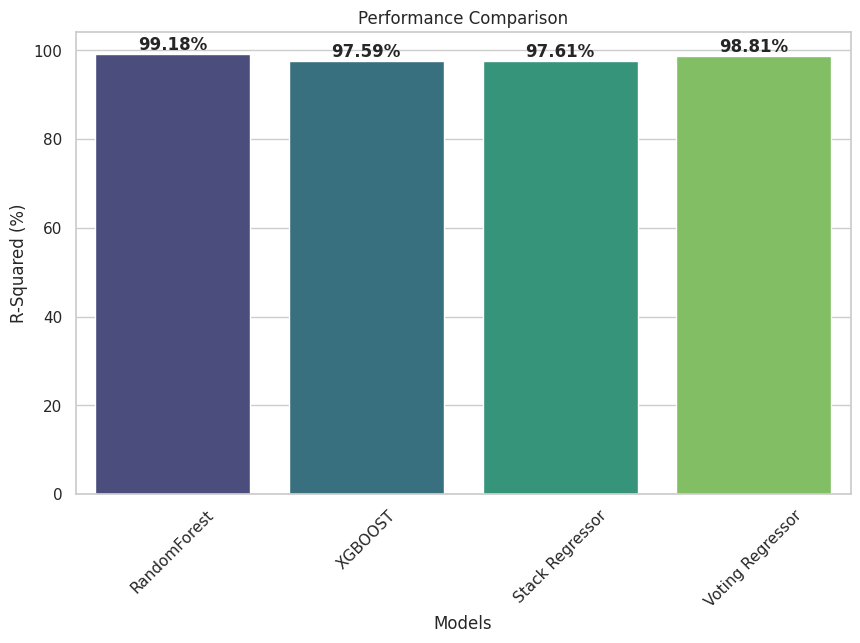

In [124]:
# Define a list of model names for labeling the box plots
model_names = ["RandomForest", "XGBOOST", "Stack Regressor", "Voting Regressor"]

# Create a list of the performance scores for each model
performance_scores = [0.991817235815373, 0.9759016452019804, 0.9761002640668013, 0.9880953933434533]

# Convert the scores to percentages
performance_percentages = [score * 100 for score in performance_scores]

# Create a bar plot to visualize the performance
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Adjust bar width and color palette
sns.barplot(x=model_names, y=performance_percentages, palette="viridis", saturation=0.7)

plt.xlabel("Models")
plt.ylabel("R-Squared (%)")
plt.title("Performance Comparison")
plt.xticks(rotation=45)

# Adding percentage labels on top of the bars
for i, percentage in enumerate(performance_percentages):
    plt.text(i, percentage, f"{percentage:.2f}%", ha='center', va='bottom', fontsize=12, weight='bold')

plt.show()

Random Forest regressor model performed better than all the models including the with an R-squared of 99%

In [125]:

import pickle
from sklearn.metrics import mean_squared_error
from lime.lime_tabular import LimeTabularExplainer


# Define feature names
feature_names = selected_features2

# Initialize the LimeTabularExplainer with feature names
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode="regression", feature_names=feature_names)

# Choosing Individual data point for explanation
data_point_idx = 30
data_point = X_test[data_point_idx]
prediction = best_rf_regressor.predict([data_point])[0]

# Defining a classification threshold
low_threshold = 100
high_threshold = 300

# Function to classify incidence rates
def classify_incidence_rate(incidence_rate):
    if incidence_rate < low_threshold:
        return "Low"
    elif low_threshold <= incidence_rate <= high_threshold:
        return "medium"
    else:
        return "High"

# Explain the prediction for the selected data point
explanation = explainer.explain_instance(data_point, best_rf_regressor.predict)

# Show LIME explanation
explanation.show_in_notebook()

# Classify the incidence rate for the data point
predicted_incidence_category = classify_incidence_rate(prediction)
print(f"Predicted Incidence Category: {predicted_incidence_category}")

Predicted Incidence Category: Low


# INTERPRETABILITY OF THE BEST MODEL USING LIME

In [126]:
import lime
import lime.lime_tabular

# Define feature names
feature_names = selected_features2

# Initialize the LimeTabularExplainer with feature names
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode="regression", feature_names=feature_names)

# Choosing Individual data point for explanation
data_point_idx = 50
data_point = X_test[data_point_idx]
prediction = best_rf_regressor.predict([data_point])[0]

# Defining a classification threshold
low_threshold = 100
high_threshold = 300

# Function to classify incidence rates
def classify_incidence_rate(incidence_rate):
    if incidence_rate < low_threshold:
        return "Low"
    elif low_threshold <= incidence_rate <= high_threshold:
        return "medium"
    else:
        return "High"

# Function to classify incidence rates as high or low
#def classify_incidence_rate(incidence_rate):
 #   if incidence_rate >= high_threshold:
  #      return "High"
  #  else:
   #     return "Low"

# Explain the prediction for the selected data point
explanation = explainer.explain_instance(data_point, best_rf_regressor.predict)

# Show LIME explanation
explanation.show_in_notebook()

# Classify the incidence rate for the data point
predicted_incidence_category = classify_incidence_rate(prediction)
print(f"Predicted Incidence Category: {predicted_incidence_category}")

Predicted Incidence Category: medium


In [127]:
explanation.as_list()

[('Malaria cases reported > 0.04', 507.9338435780579),
 ('Total Malaria Cases > -0.03', -72.95388144487393),
 ('-0.26 < Total Population <= 0.17', -50.2833012927688),
 ('Mortality Rate > 0.50', -21.6931654717317),
 ('Malaria death > 0.01', -3.0721712044492047)]

In [128]:
import lime
import lime.lime_tabular

# Define feature names
feature_names = selected_features2

# Initialize the LimeTabularExplainer with feature names
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode="regression", feature_names=feature_names)

# Choosing Individual data point for explanation
data_point_idx = 65
data_point = X_test[data_point_idx]
prediction = best_rf_regressor.predict([data_point])[0]

# Defining a classification threshold
low_threshold = 100
high_threshold = 300

# Function to classify incidence rates
def classify_incidence_rate(incidence_rate):
    if incidence_rate < low_threshold:
        return "Low"
    elif low_threshold <= incidence_rate <= high_threshold:
        return "medium"
    else:
        return "High"

# Function to classify incidence rates as high or low
#def classify_incidence_rate(incidence_rate):
#   if incidence_rate >= high_threshold:
  #      return "High"
  #  else:
   #     return "Low"

# Explain the prediction for the selected data point
explanation = explainer.explain_instance(data_point, best_rf_regressor.predict)

# Show LIME explanation
explanation.show_in_notebook()

# Classify the incidence rate for the data point
predicted_incidence_category = classify_incidence_rate(prediction)
print(f"Predicted Incidence Category: {predicted_incidence_category}")

Predicted Incidence Category: High


# Preparing the model for deployment

In [129]:

# Define the components to save
model_components = {
    "best_rf_regressor": best_rf_regressor,
    "low_threshold": low_threshold,
    "high_threshold": high_threshold,
    'X_train': X_train,
    'feature_names': feature_names
}

# Generate lime explanation
explanation = explainer.explain_instance(data_point, best_rf_regressor.predict)

#extracting feature importance and contributions
explanation_text = 'LIME Explanation:\n'
explanation_text += f'Predicted Category: {[predicted_incidence_category]}'
explanation_text += 'Feature Contributions:\n'
for feature, score in explanation.as_list():
  explanation_text += f'{feature}: {score}\n'

#adding lime explanation to components
model_components["lime_explanation"] = explanation_text

# Defining the filename for the pickle file
pickle_filename = "model_components.pkl"

# Save the model components to the pickle file
with open(pickle_filename, "wb") as pickle_file:
    pickle.dump(model_components, pickle_file)

print(f"Model components saved to {pickle_filename}")

Model components saved to model_components.pkl


In [130]:
X_train

array([[ 0.01100479, -0.27523896, -0.27656497, -0.45641012, -0.26364681],
       [-0.1844827 ,  0.02385327,  0.03980072,  1.02290991, -0.25528472],
       [-0.51523716, -0.27218145, -0.30108211, -0.44161119, -0.26304341],
       ...,
       [-0.27080558, -0.2317544 , -0.31343248, -0.39362682, -0.14633888],
       [ 0.37850175, -0.2435428 , -0.18749567, -0.03136873, -0.38072855],
       [-0.47555939,  0.53007469,  0.54108709,  1.32789784,  0.14489108]])

In [131]:

from google.colab import files

uploaded = files.upload()

Saving model_components (1).pkl to model_components (1) (3).pkl


In [134]:

import pickle
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

pickle_filename = "model_components (1) (3).pkl"

# Load the model components from the pickle file
with open(pickle_filename, "rb") as pickle_file:
    model_components = pickle.load(pickle_file)

#extracting the model components
model = model_components["best_rf_regressor"]
lime_explainer = LimeTabularExplainer(
    model_components["X_train"],
    mode = 'regression',
    feature_names = model_components["feature_names"]
)
def predict_with_lime_explanation(input_features):
  prediction = model.predict([input_features])[0]

  #I am generating the lime explanation here
  explanation = lime_explainer.explain_instance(
      input_features,
      model.predict,
      num_features = len(model_components["feature_names"])
  )
  #Extracting feature importance and contributions
  explanation_text = 'LIME Explanation:\n'
  for feature, score in explanation.as_list():
    explanation_text += f"f{feature}: {score}\n"

  low_threshold = 100
  high_threshold = 300

  # Function to classify incidence rates
  if prediction < low_threshold:
        incidence_category = 'Low'
  elif prediction <= high_threshold:
        incidence_category = 'Medium'
  else:
        incidence_category = 'High'

  #Return
  return {
      'Prediction': prediction,
      'Incidence_Category': incidence_category,
      'Explanation': explanation_text
  }


In [135]:
input_features = np.array([300, 50000, 800, 100, 200])

result = predict_with_lime_explanation(input_features)

# Display
print('Prediction:', result['Prediction'])
print('Incidence Category:', result['Incidence_Category'])
print(result['Explanation'])





Prediction: 156.34847363380064
Incidence Category: Medium
LIME Explanation:
fMalaria cases reported > 0.04: 508.7200425632843
fTotal Population > 0.17: -99.17504492801464
fTotal Malaria Cases > -0.03: -69.7594256413979
fMalaria death > 0.01: -21.93877247057539
fMortality Rate > 0.50: -11.456333060355794

